In [40]:
import numpy as np #библиотека для работы с многомерными массивами данных и математическими операциями над ними
import pandas as pd #библиотека для анализа и обработки данных
from sklearn.datasets import load_iris #берём датасет
import matplotlib.pyplot as plt #простое рисование графиков
import seaborn as sns #удобные дефолтные настройки графиков из matpotlib

%matplotlib inline
#для сохранения в ноутбуке вывода моих графиков

In [41]:
# Загрузите данные, если их еще нет на диске, и загрузите их в виде массивов
df = load_iris()
# Смотрим описание
print(df.DESCR)

# Смотрим названия целей (всего 3)
for name in df.target_names:
    print(name)

#sepal - чашелистик
#petal - лепесток

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Создаем датафрейм на основе необходимых полей. Задаём поле Данные и Колонки.
Выведем на экран, чтобы посмотреть на получившуюся таблицу, которую будем анализировать дальше.

In [42]:
df = pd.DataFrame(data = np.c_[df['data'], df['target']], columns = df['feature_names'] + ['target'])
df.head()
#

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Посмотрим на типы данных. Получили, что все данные - представитали типа float64, а пустых ячеек нет ни в одной строке.
Это упрощает работу, поскольку не нужно обрабатывать уникальные поля.

In [43]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [44]:
df[df.isnull().any(axis=1)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


In [45]:
df.describe() #Кол-во; Среднее; и т.д. (кстати, что?)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


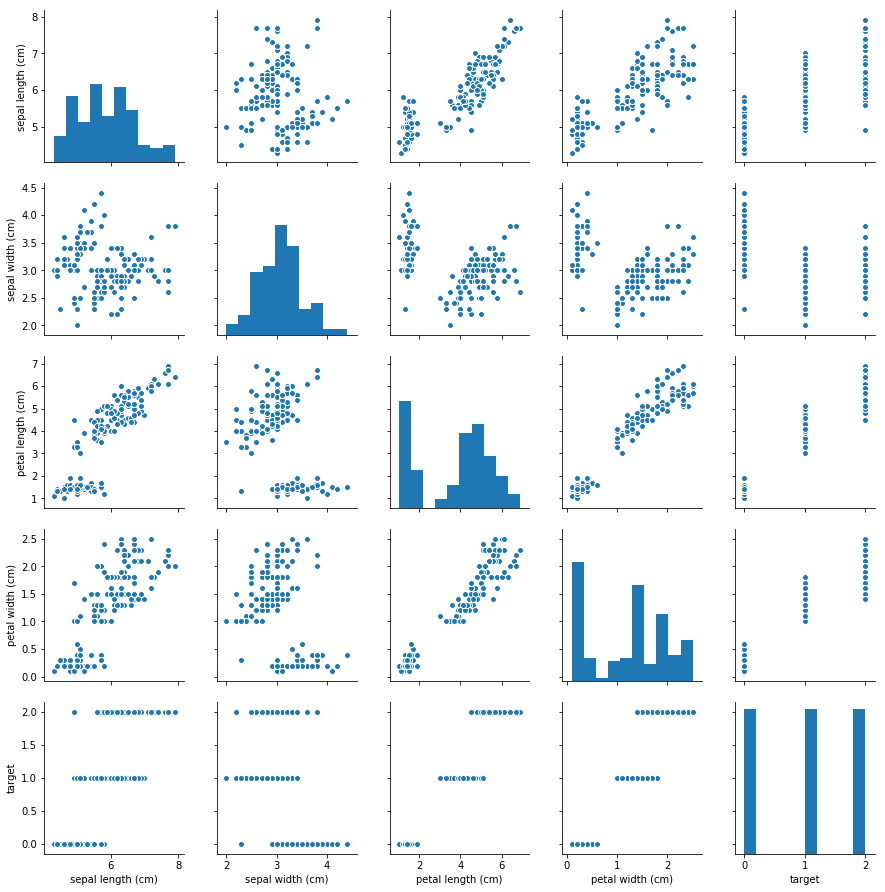

In [46]:
sns.pairplot(data=df)

Наша цель содержит 3 класса, поэтому удобно использовать параметр hue, который покрасит наши графики по нашим target-ам.

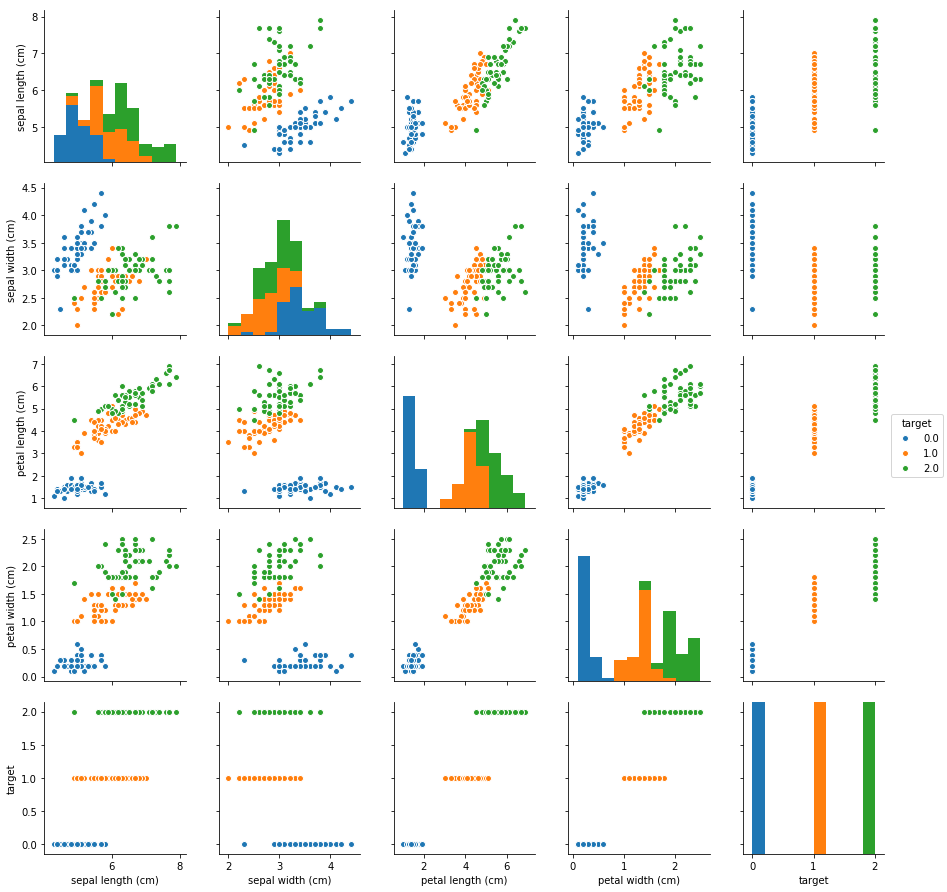

In [47]:
sns.pairplot(data=df, hue='target')

А теперь осталась только Корреляция:

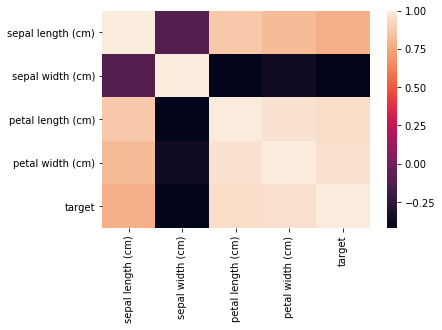

In [48]:
sns.heatmap(df.corr())

Вот и всё! :)

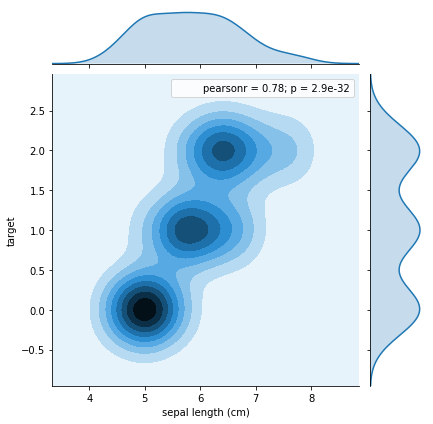

In [49]:
sns.jointplot(x="sepal length (cm)", y="target", data=df, kind="kde")

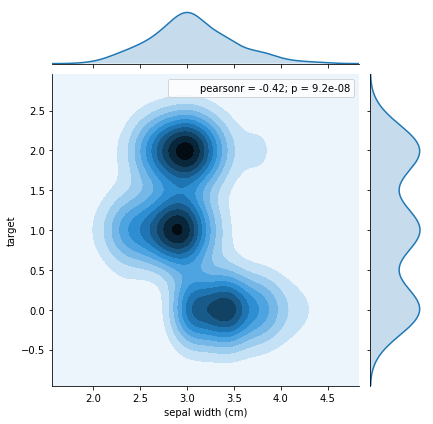

In [50]:
sns.jointplot(x="sepal width (cm)", y="target", data=df, kind="kde")

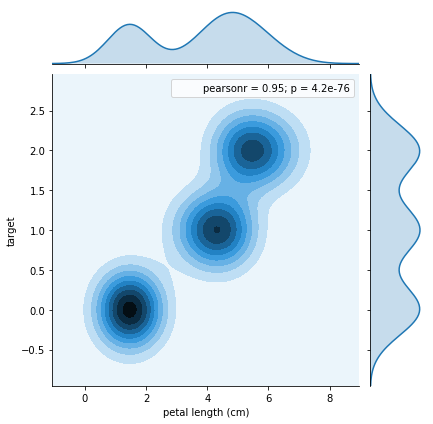

In [51]:
sns.jointplot(x="petal length (cm)", y="target", data=df, kind="kde")

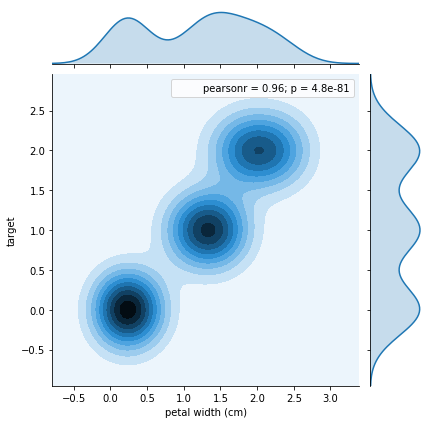

In [52]:
sns.jointplot(x="petal width (cm)", y="target", data=df, kind="kde")

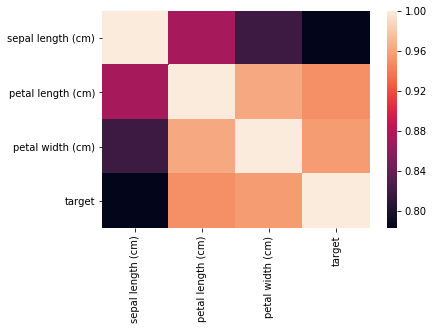

In [53]:
df = df.drop(['sepal width (cm)'], axis=1)
sns.heatmap(df.corr())